## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


## Import Data

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
## check if there are any null values present in the dataset
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.duplicated().sum()

0

* The above anaylsis shows that there are no no null or duplicate values in the dataset

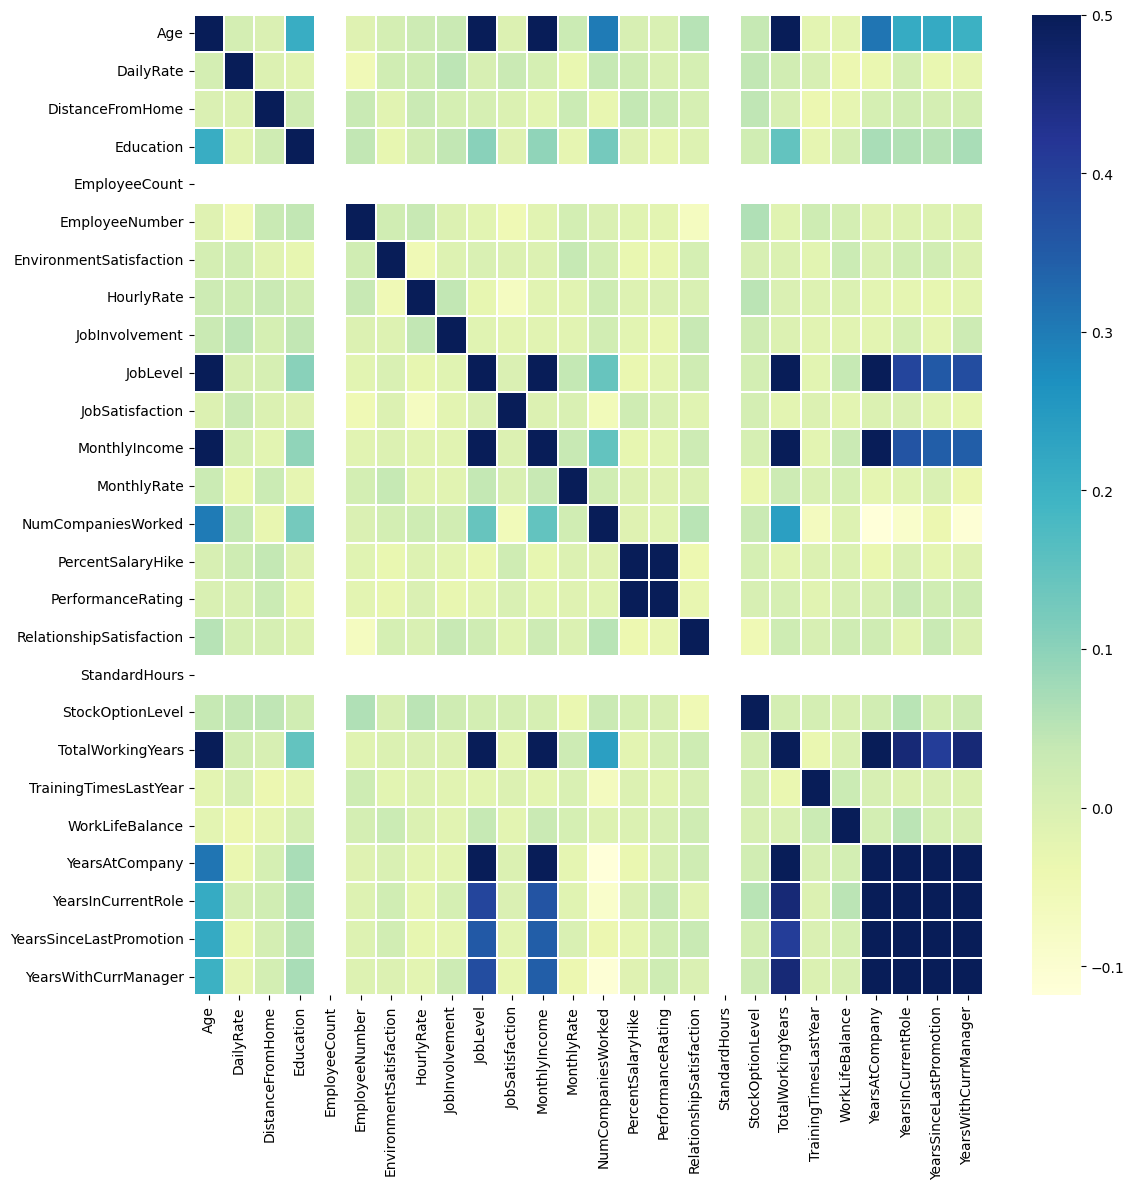

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmax=.5, linewidths=.2, cmap = "YlGnBu")
plt.tight_layout()

In [9]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

(array([ 237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1233.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

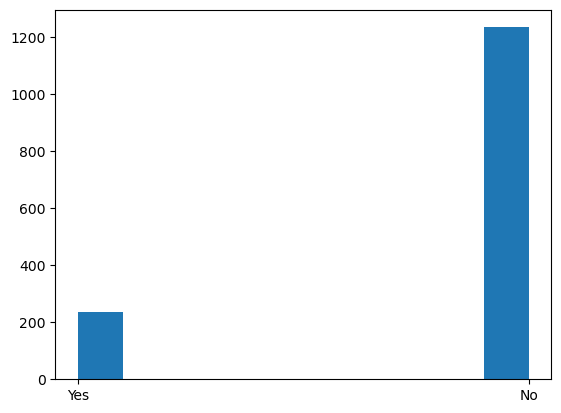

In [10]:
plt.hist(df['Attrition'])

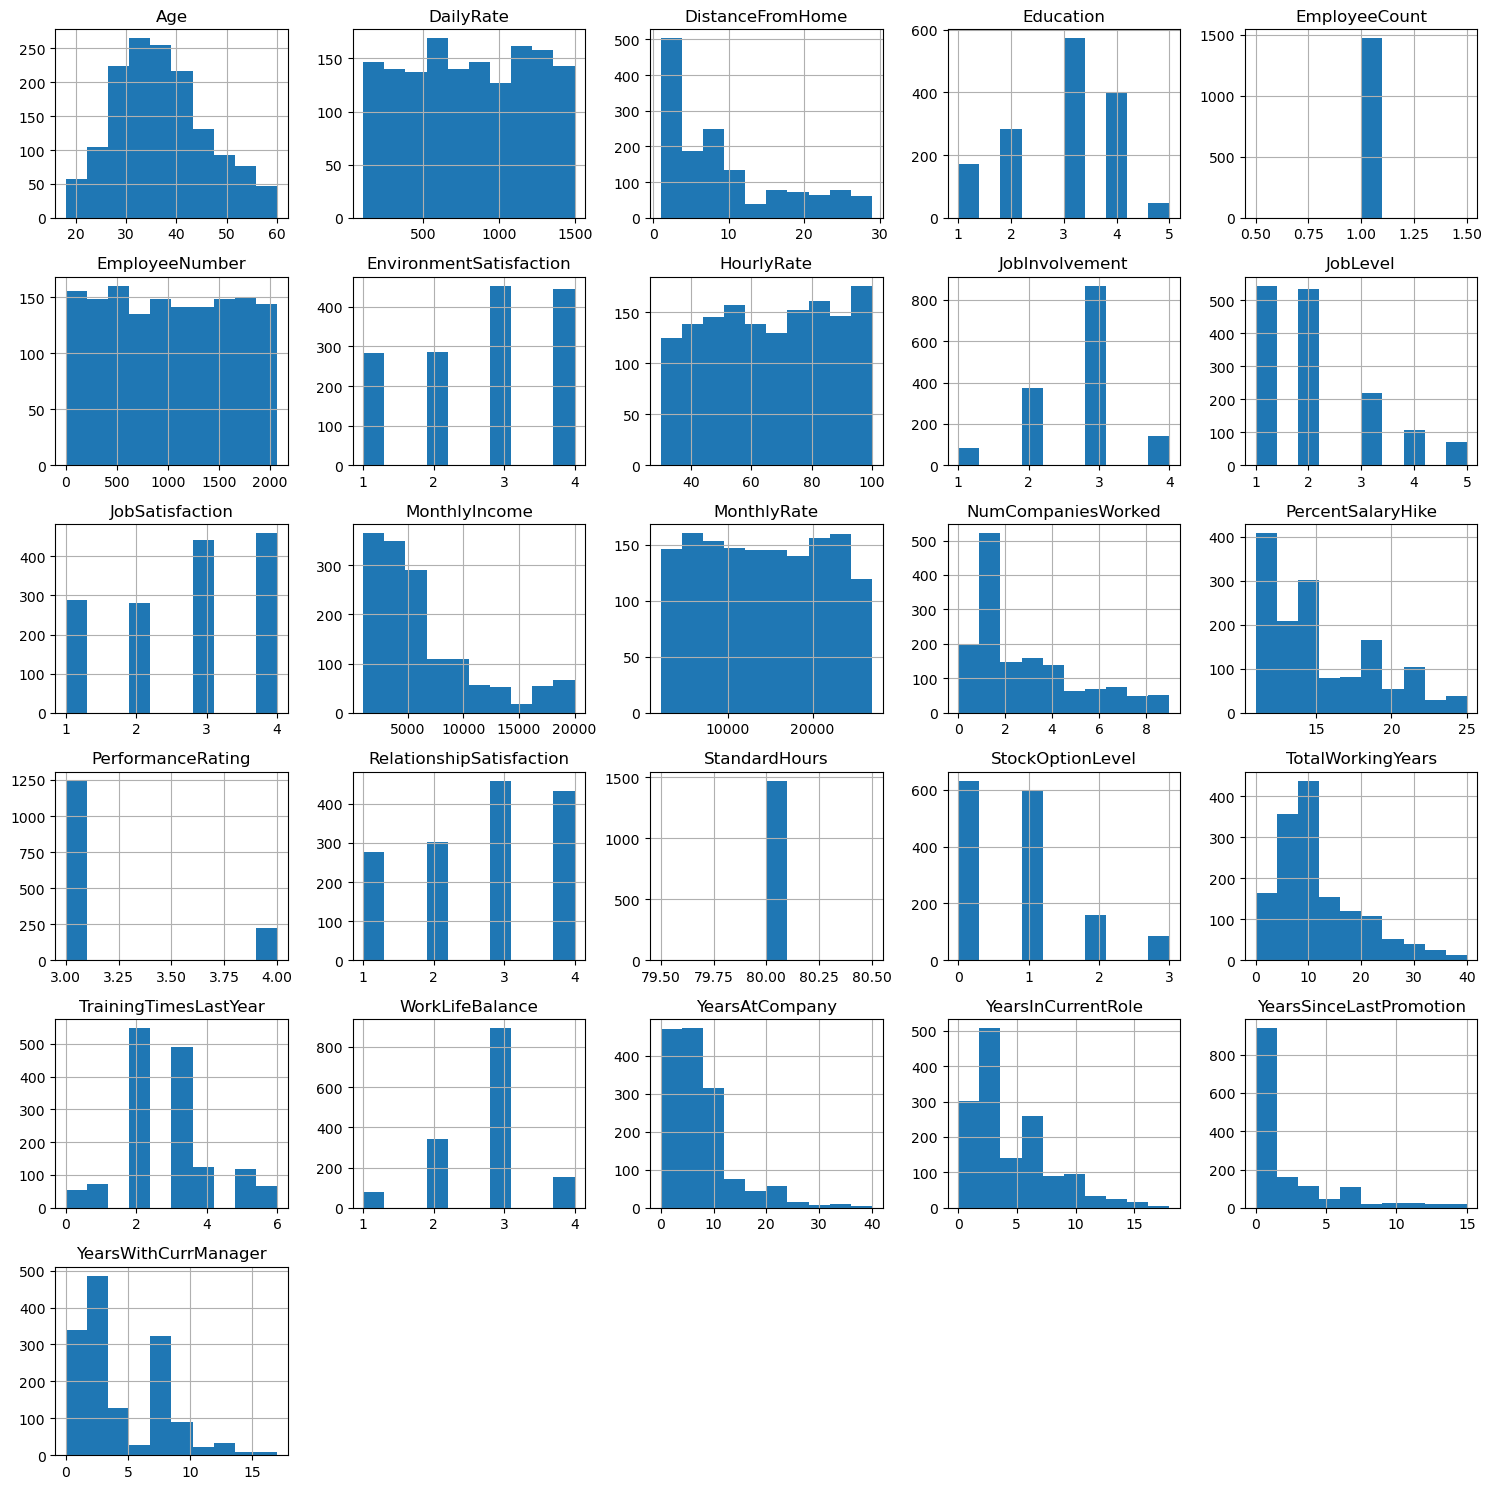

In [11]:
df.hist(figsize=(15,15))
plt.tight_layout()

Observations from the above histogram plot

1. Employee Count and Standard hours have reduntant values and will not make a lot of impact on the output and hence they can be dropped.

2. Make features are right skewed like Distancefromhome, YearsSinceLastPromotion, YearsAtCompany, PercentSalaryHike, Monthly income.

3. Age is slightly right skewed lies and majority lies between the age of 30 and 35.

## Age distribution for ex-employees vs current employees

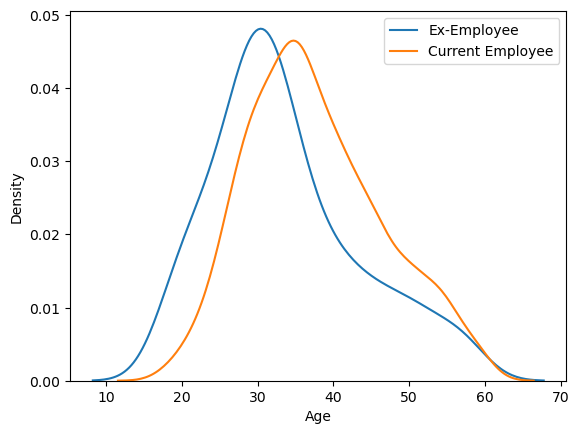

In [12]:
sns.kdeplot(df[df['Attrition']=='Yes']['Age'],label = 'Ex-Employee')
sns.kdeplot(df[df['Attrition']=='No']['Age'],label = 'Current Employee')
plt.legend()

* The graph tells that the younger employees are more likely to leave the organization

## Salary's impact on attrition

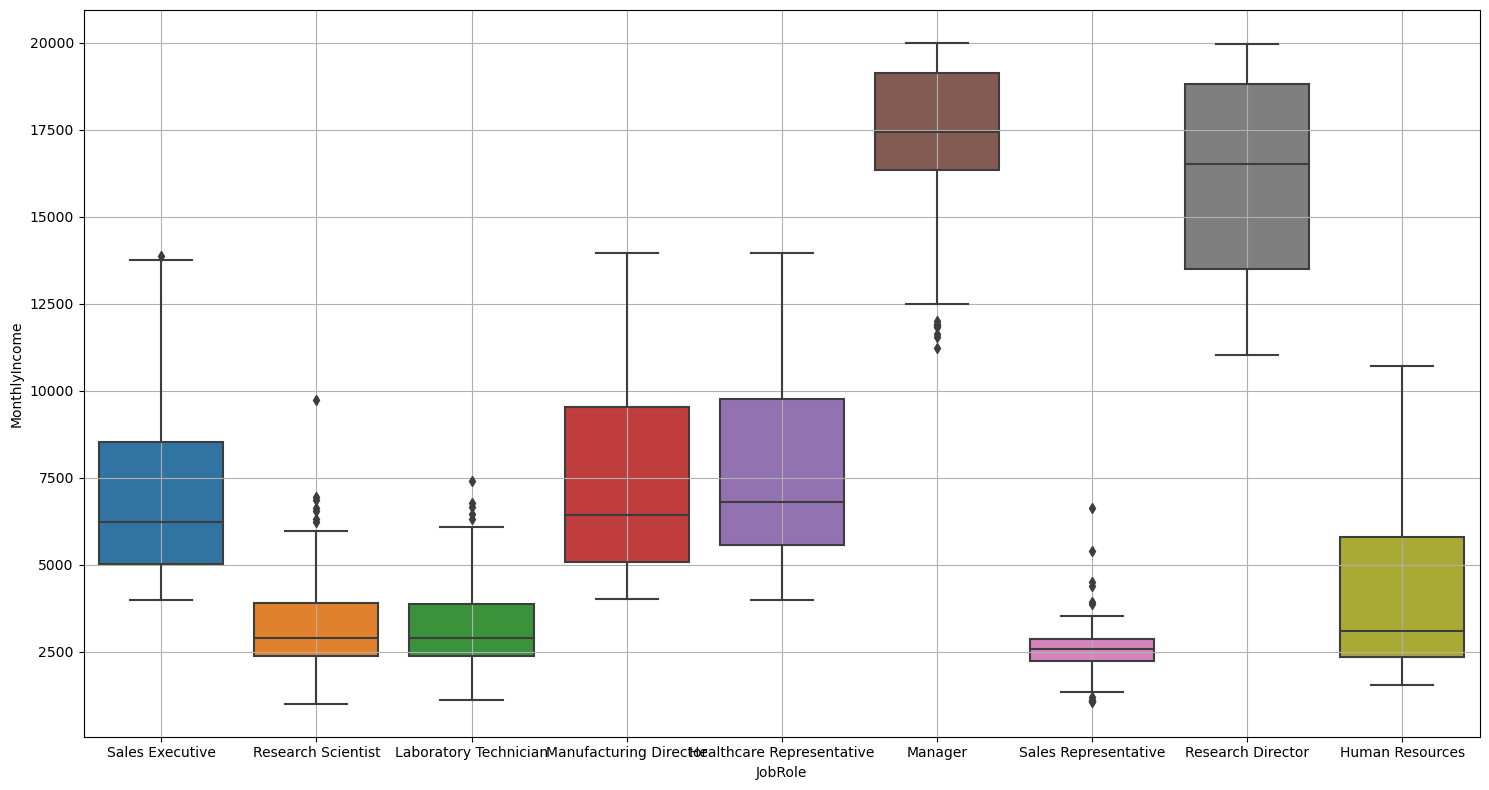

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(y = df['MonthlyIncome'], x = df['JobRole'])
plt.grid(True,alpha=1)
plt.tight_layout()

Observations from the above graphs shows that

* Managers and Research Directors are paid very high whereas Research Scientist, Lab Technician and Sales Representative are paid the least, so these departments can have higher risk of leaving the organisation. We can confirm these findings in the next graphs

## Now let's check the attrition in each JobRole

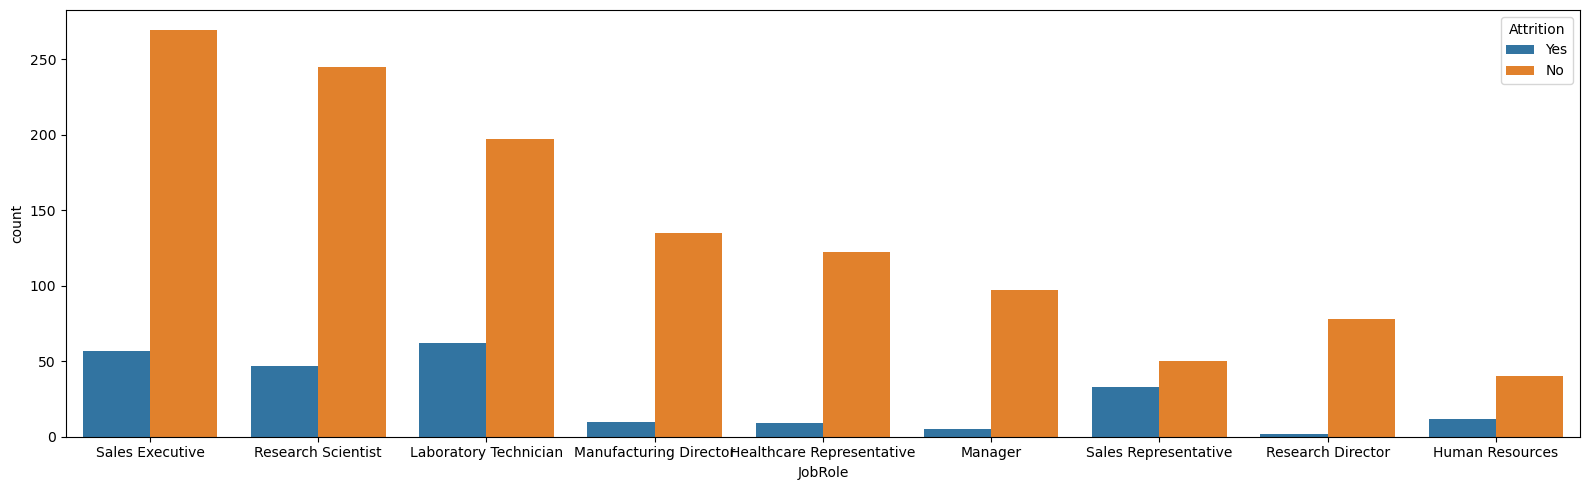

In [14]:
#sns.catplot(x='JobRole',hue="Attrition", data=df, kind="count",height=7, aspect=2, legend=False)
plt.figure(figsize=(16,5))
sns.countplot(x=df['JobRole'], hue=df['Attrition'])
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()

The above observation confirms that there are more attrition in the Sales Executive, Research Scientist and Lab Technician and Manager and Research Director has very less attrition. This confirms that salary does have a big impact on the attrition rate.

## Let's see which JobRole works overtime 

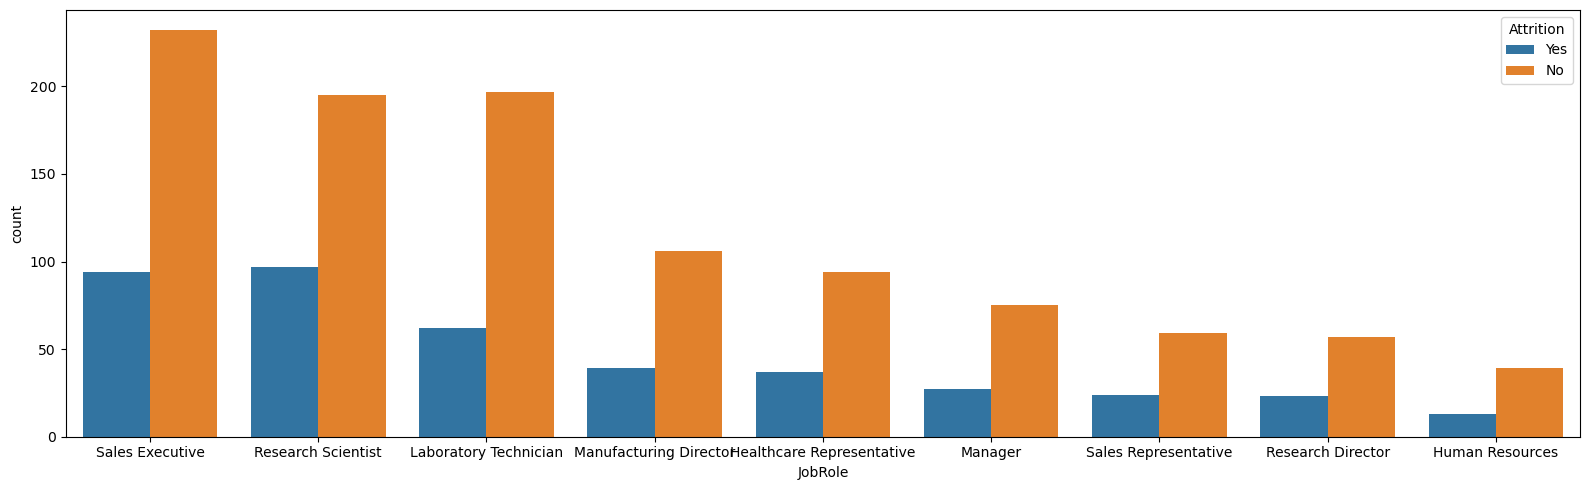

In [15]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['JobRole'], hue=df['OverTime'])
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()

We can see that the same Job Roles are working overtime the most and can be another factor that leads to attrition.

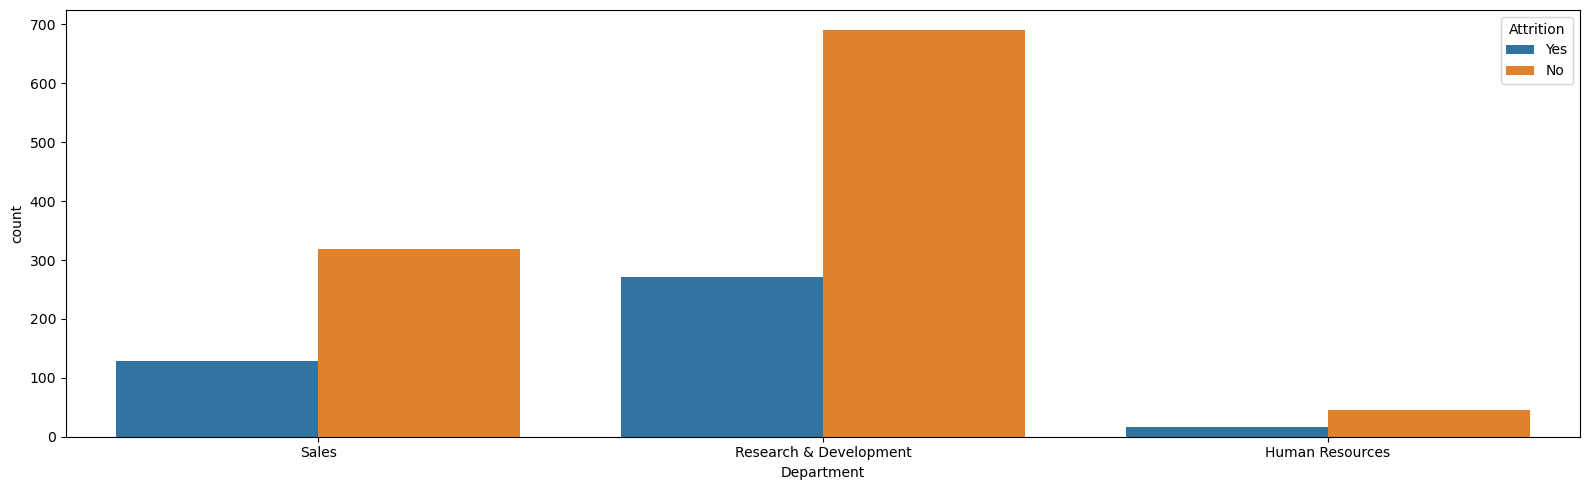

In [16]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['Department'], hue=df['OverTime'])
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()

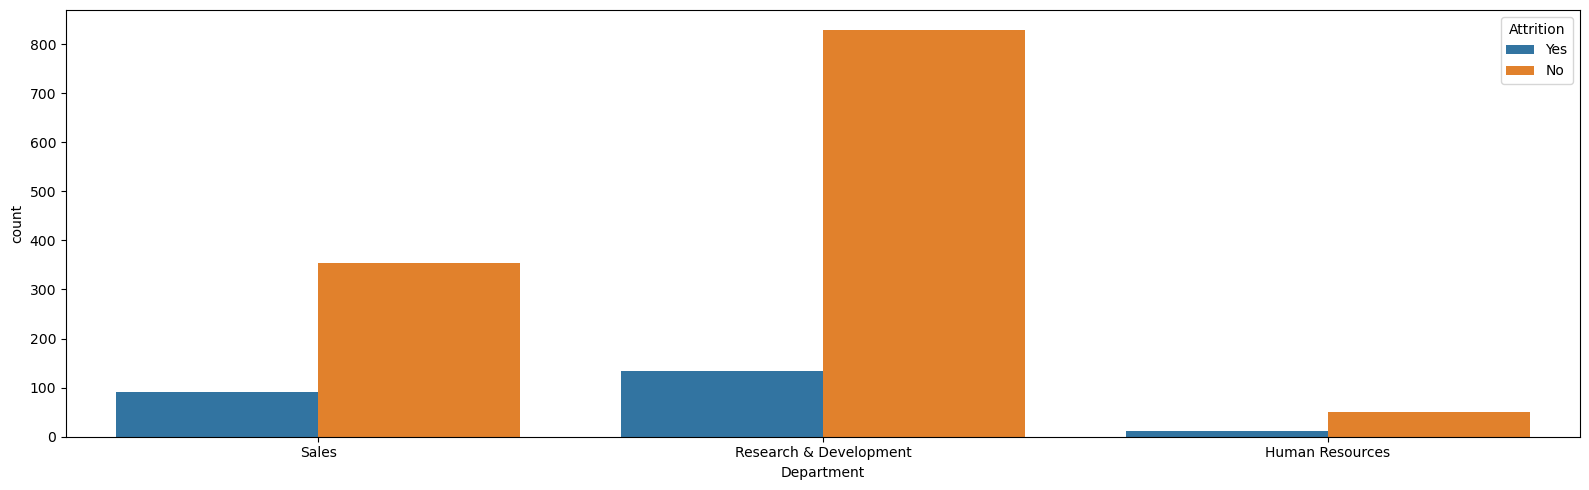

In [17]:
plt.figure(figsize=(16,5))
sns.countplot(x=df['Department'], hue=df['Attrition'])
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()

## We can also compare distancefromhome and attrition to check if distance matters

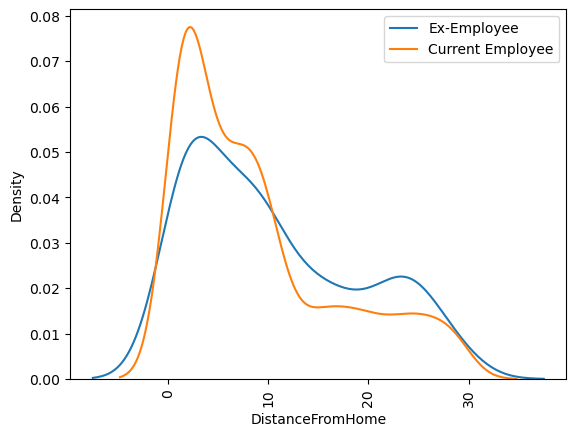

In [18]:
kde = sns.kdeplot(df[df['Attrition']=='Yes']['DistanceFromHome'],label = 'Ex-Employee')
kde = sns.kdeplot(df[df['Attrition']=='No']['DistanceFromHome'],label = 'Current Employee')
kde.set_xticklabels(kde.get_xticklabels(), rotation=90)
plt.legend()

## Splitting categorical and numerical features

In [19]:
cat_features = [i for i in df.columns if df[i].dtype == 'object']
        
cat_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [20]:
cat_df = df[[i for i in df if i in cat_features]]
cat_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [21]:
numeric_features = [i for i in df if i not in cat_features]
numeric_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [22]:
num_df = df[[i for i in df if i not in cat_features]]
num_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


## Outlier Detection

In [23]:
numeric_data= df[[feature for feature in numeric_features if feature not in ['MonthlyIncome', 
                                                                               'MonthlyRate', 
                                                                               'DailyRate',
                                                                               'HourlyRate']]]

numeric_melt = numeric_data.melt()
numeric_melt

,variable,value
0,Age,41
1,Age,49
2,Age,37
3,Age,33
4,Age,27
...,...,...
32335,YearsWithCurrManager,3
32336,YearsWithCurrManager,7
32337,YearsWithCurrManager,3
32338,YearsWithCurrManager,8


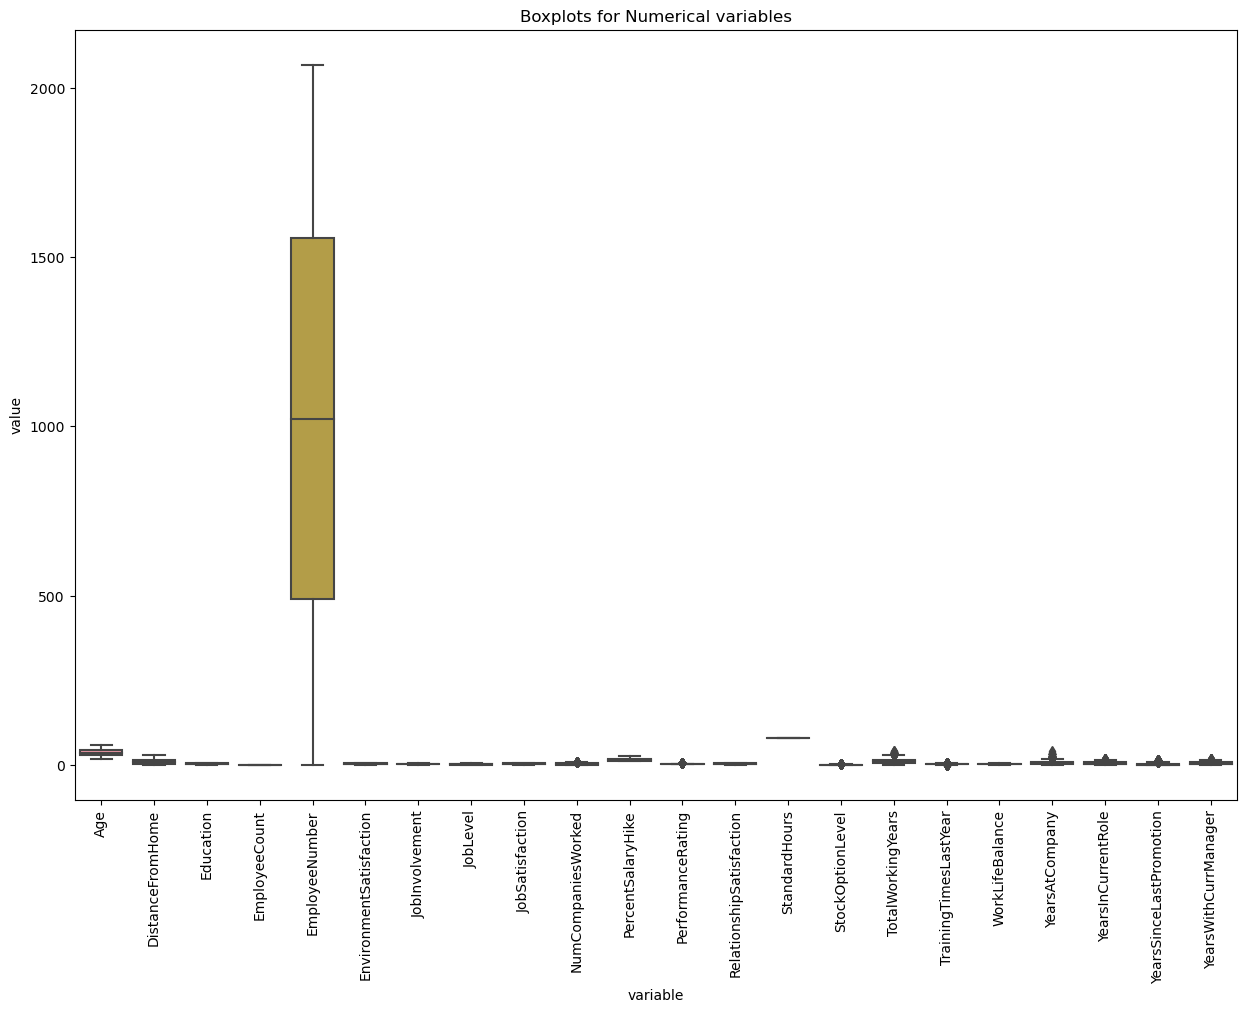

In [24]:
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=numeric_melt)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

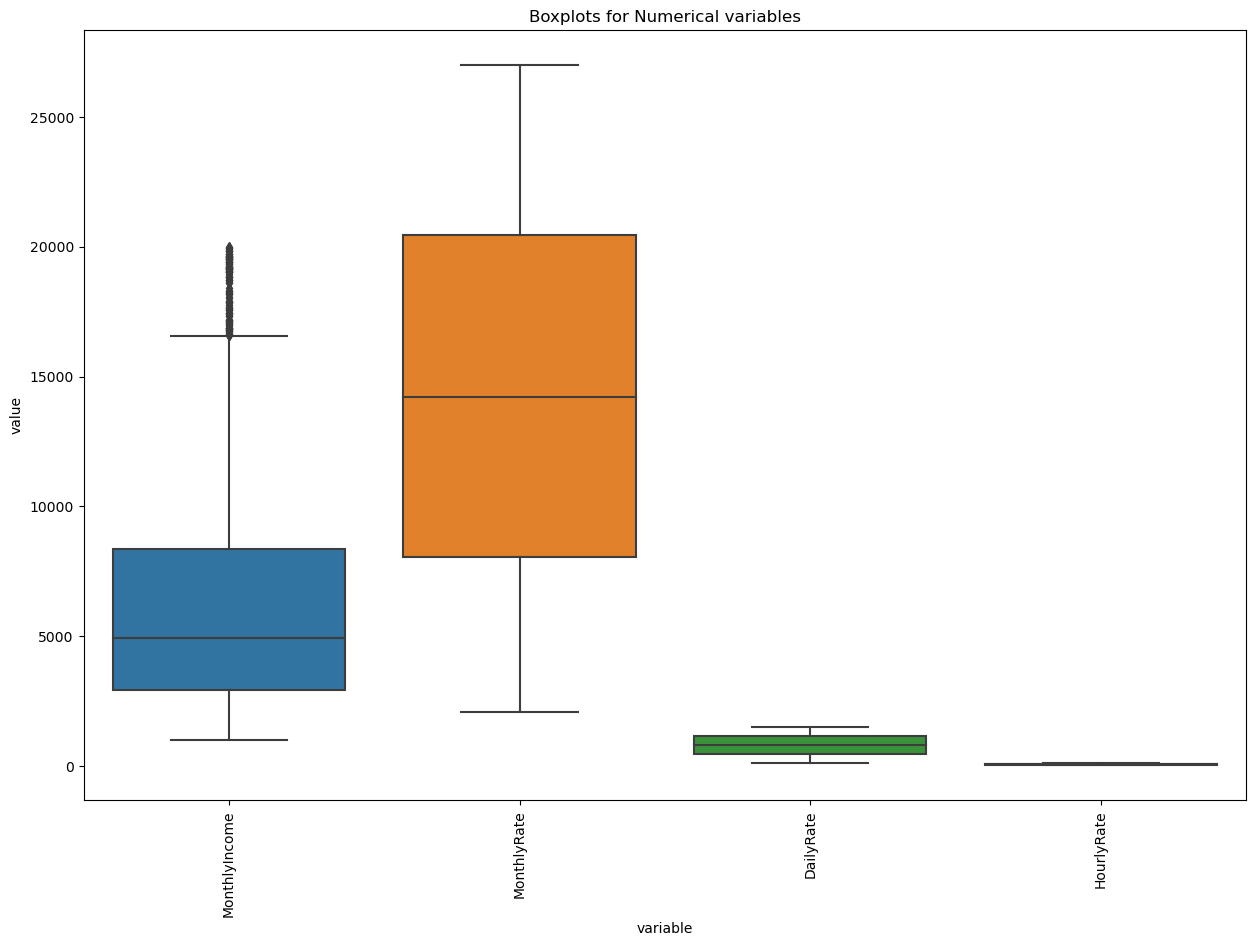

In [25]:
numeric_data = df[['MonthlyIncome', 'MonthlyRate', 'DailyRate','HourlyRate']]
numeric_melt = numeric_data.melt()

plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=numeric_melt)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

The above boxplots shows that the features having outliers are:
* MonthlyIncome
* TotalWorkingYears
* TrainingTimesLastYear
* YearsInCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager

Other features are not included as they have very less no of outliers

In [26]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager', 'TrainingTimesLastYear', 'NumCompaniesWorked', 'MonthlyIncome']:
    temp_data = df.sort_values(by=feature)[feature]
    Q1, Q3 = temp_data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((temp_data<(Q1 - 1.5 * IQR)) | 
                                        (temp_data>(Q3 + 1.5 * IQR))).sum()/temp_data.shape[0])*100,2)
outlier_percentage

{'TotalWorkingYears': 4.29,
 'YearsAtCompany': 7.07,
 'YearsInCurrentRole': 1.43,
 'YearsSinceLastPromotion': 7.28,
 'YearsWithCurrManager': 0.95,
 'TrainingTimesLastYear': 16.19,
 'NumCompaniesWorked': 3.54,
 'MonthlyIncome': 7.76}

In [27]:
# Outlier treatment with more thatn 4% outlier values
df_outlier = df.copy()
for feature in ['TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'TrainingTimesLastYear', 
                'MonthlyIncome']:
    temp_data = df_outlier.sort_values(by=feature)[feature]
    Q1, Q3 = temp_data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)    
    df_outlier.loc[(df_outlier[feature]<(Q1 - 1.5 * IQR))|(df_outlier[feature]>(Q3 + 1.5 * IQR)), 
                   feature] = Upper_range  

## Converting categorical features to numerical

In [28]:
df = df_outlier.copy()
df.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Check number of categories in each categorical column

In [30]:
for i in cat_df:
    print(cat_df[i].value_counts(),'\n**************************************')

No     1233
Yes     237
Name: Attrition, dtype: int64 
**************************************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 
**************************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
**************************************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
**************************************
Male      882
Female    588
Name: Gender, dtype: int64 
**************************************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resource

In [31]:
## Drop over18 as it has only one category and will not have major impact on the dependent variable
cat_df = cat_df.drop('Over18',axis=1)
cat_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [32]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [33]:
ohe = OneHotEncoder()
le = LabelEncoder()

In [34]:
two_cat = cat_df[['Attrition', 'Gender', 'OverTime']]
two_cat

,Attrition,Gender,OverTime
0,Yes,Female,Yes
1,No,Male,No
2,Yes,Male,Yes
3,No,Female,Yes
4,No,Male,No
...,...,...,...
1465,No,Male,No
1466,No,Male,No
1467,No,Male,Yes
1468,No,Male,No


In [35]:
multi_cat = cat_df[[i for i in cat_df if i not in two_cat]]
multi_cat

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married
...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married


In [36]:
for feature in two_cat:
    le.fit(two_cat[feature])
    two_cat[feature] = le.transform(two_cat[feature])
two_cat

,Attrition,Gender,OverTime
0,1,0,1
1,0,1,0
2,1,1,1
3,0,0,1
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,1
1468,0,1,0


In [37]:
multi_cat = pd.get_dummies(multi_cat, drop_first=True)
multi_cat

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1466,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1467,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1468,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [38]:
num_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [39]:
num_df = num_df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours'], axis =1)
num_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [40]:
data = pd.concat([num_df,two_cat,multi_cat], axis=1)
data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,1,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,0,1,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,0,1,0,1,0


## Model Training

In [41]:
X = data.drop('Attrition',axis =1)
y = data['Attrition']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

In [43]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Function to fit and get accuracy and F1_score for the model 
def get_accuracy_model(model,train_x, test_x, train_y, test_y):
    model.fit(train_x,train_y) #fit model using train_x and train_y dataset
    predict_y = model.predict(test_x) #opredicting y value 
    accuracy = accuracy_score(test_y,predict_y) # calculating accuracy
    precision = precision_score(test_y, predict_y)
    recall = recall_score(test_y, predict_y)
    f1_score1 = f1_score(test_y,predict_y,average='macro')
    return (accuracy,precision,recall,f1_score1)

In [70]:
# funtion to create all 6 models which are using in this task and to get accuracy for each of them
def create_all_model(train_x,train_y,test_x,test_y):
        
    model_name_list = ['LogisticRegression','SVC','DecisionTree','RandomForest','XGBoost']
    accuracy_score_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    accu_result = []
    
    lr_model = LogisticRegression(class_weight={0:1, 1:10}) #creating LogisticRegression model
    # getting accuracy and F1_score for LogisticRegression
    accu_result.append(get_accuracy_model(lr_model,train_x, test_x, train_y, test_y))
    
    svc_model = SVC(class_weight={0:1, 1:10}) #creating SVC model
    #getting accuracy and F1_score for SVC
    accu_result.append(get_accuracy_model(svc_model,train_x, test_x, train_y, test_y))
  
    dt_model = DecisionTreeClassifier(criterion='entropy', class_weight={0:1, 1:10}) #creating Decision Tree model
    #getting accuracy and F1_score for Decision Tree model    
    accu_result.append(get_accuracy_model(dt_model,train_x, test_x, train_y, test_y))

    rf_model = RandomForestClassifier(class_weight={0:1, 1:10})#creating RandomForest classifier
    #getting accuracy and F1_score for RandomForest classifier
    accu_result.append(get_accuracy_model(rf_model,train_x, test_x, train_y, test_y))
    
    xg_model = xgboost.XGBClassifier()
    accu_result.append(get_accuracy_model(xg_model,train_x, test_x, train_y, test_y))
    
    
    for accuracy in accu_result: #looping through accuracy of each classifier
        accuracy_score_list.append(accuracy[0]) #accuracy into list
        precision_list.append(accuracy[1]) #precision into list
        recall_list.append(accuracy[2]) #recall into list
        f1_score_list.append(accuracy[3]) #F1_score into list
    #result dataframe for the classifier build using the particular node classifier
    accu_df = pd.DataFrame(list(zip(model_name_list,accuracy_score_list,precision_list, recall_list,f1_score_list)),
                    columns = ['Classifier','Accuracy','Precision','Recall','F1_score'])
    return accu_df


In [71]:
%%time  
all_models_df = create_all_model(X_train,y_train,X_test,y_test)

CPU times: user 1.23 s, sys: 122 ms, total: 1.35 s
Wall time: 727 ms


In [72]:
all_models_df

,Classifier,Accuracy,Precision,Recall,F1_score
0,LogisticRegression,0.693878,0.324176,0.830986,0.625888
1,SVC,0.780045,0.370000,0.521127,0.648160
2,DecisionTree,0.777778,0.285714,0.253521,0.568820
3,RandomForest,0.845805,0.615385,0.112676,0.552632
4,XGBoost,0.848073,0.562500,0.253521,0.631753


## Logistic Regression

In [48]:
model = LogisticRegression(class_weight={0:1, 1:10})
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

In [49]:
y_pred = model.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[247 123]
 [ 12  59]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79       370
           1       0.32      0.83      0.47        71

    accuracy                           0.69       441
   macro avg       0.64      0.75      0.63       441
weighted avg       0.85      0.69      0.73       441



The accuracy is 0.69
The balanced accuracy is 0.75
The recall is 0.83
The precision is 0.32
The F1 Score is 0.47
The AUC ROC Score is 0.75


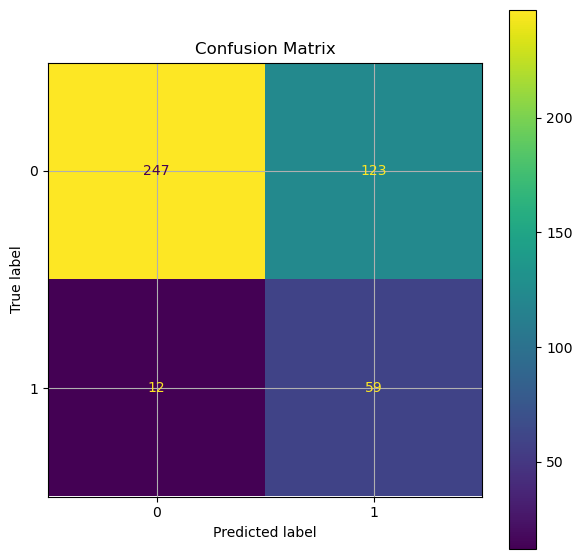

In [51]:
# Performance Evaluation Metrics 
print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("The recall is {:.2f}".format(recall_score(y_test, y_pred)))
print("The precision is {:.2f}".format(precision_score(y_test, y_pred)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, y_pred)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
                              
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.grid(None)
plt.show()

We have got a good score of recall and aucroc which is 0.83. Our aim here was to get a high value of recall as we want to reduce the Type II error i.e having as low number of False positives as possible. This is because False Negative shows that the employee will stay when employee is planning to quit and this will lead to chances of employee attrition which we want to reduce.